In [10]:
import numpy as np
import mahotas
import json
import cv2
import matplotlib.pyplot as plt
import random
import os
import pandas as pd
from skimage.transform import resize
import plotly.express as px
import seaborn as sns

In [3]:
DATASET_FOLDER = "/Users/jiehyun/kaggle/input/hubmap-organ-segmentation/"
TRAIN_IMAGES = DATASET_FOLDER + "train_images"
TRAIN_ANNOT = DATASET_FOLDER + "train_annotations"
TRAIN_CSV = DATASET_FOLDER + "train.csv"
train_df = pd.read_csv(TRAIN_CSV)
binary_masks = DATASET_FOLDER + "binary_masks"
OUTPUT_FOLDER = "/Users/jiehyun/kaggle/output/"
IMG_NPZ = OUTPUT_FOLDER + 'img_npz'
MASK_NPZ = OUTPUT_FOLDER + 'mask_npz'

In [4]:
train_df

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
0,10044,prostate,HPA,3000,3000,0.4,4,1459676 77 1462675 82 1465674 87 1468673 92 14...,37.0,Male
1,10274,prostate,HPA,3000,3000,0.4,4,715707 2 718705 8 721703 11 724701 18 727692 3...,76.0,Male
2,10392,spleen,HPA,3000,3000,0.4,4,1228631 20 1231629 24 1234624 40 1237623 47 12...,82.0,Male
3,10488,lung,HPA,3000,3000,0.4,4,3446519 15 3449517 17 3452514 20 3455510 24 34...,78.0,Male
4,10610,spleen,HPA,3000,3000,0.4,4,478925 68 481909 87 484893 105 487863 154 4908...,21.0,Female
...,...,...,...,...,...,...,...,...,...,...
346,9517,kidney,HPA,3000,3000,0.4,4,1611763 11 1614753 29 1617750 35 1620746 43 16...,61.0,Male
347,9769,kidney,HPA,3070,3070,0.4,4,4030400 28 4033466 34 4036526 48 4039594 54 40...,28.0,Male
348,9777,largeintestine,HPA,3000,3000,0.4,4,538473 13 541468 22 544463 30 547461 35 550459...,84.0,Male
349,9791,kidney,HPA,3000,3000,0.4,4,334733 33 337729 43 340729 43 343725 51 346723...,28.0,Male


In [5]:
fig = px.histogram(train_df, "organ", color="organ", title="<b>Number of Segmentation Masks Per Organ Type</b>",text_auto=True,)
fig.show()

In [6]:
fig = px.histogram(train_df, train_df["age"], color="organ", 
                   title="<b>Number of Segmentation Masks Per Age Bin by Organ Type </b>",
                   labels={"organ":"<b>Organ Legend</b>", 
                         "count":"<b>Number Of Observations</b>",
                         "x":"<b>Age</b>"}, text_auto=True,
                  )
fig.show()

In [7]:
fig = px.histogram(train_df, train_df["sex"], color="organ", 
                   title="<b>Examples by Gender (0=Male, 1=Female) and Organ Type</b>",
                   labels={"organ":"<b>Organ Legend</b>", 
                         "count":"<b>Number Of Observations</b>",
                         "sex":"<b>Sex</b>"},text_auto=True, barmode="group",
                  )
fig.show()

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                351 non-null    int64  
 1   organ             351 non-null    object 
 2   data_source       351 non-null    object 
 3   img_height        351 non-null    int64  
 4   img_width         351 non-null    int64  
 5   pixel_size        351 non-null    float64
 6   tissue_thickness  351 non-null    int64  
 7   rle               351 non-null    object 
 8   age               351 non-null    float64
 9   sex               351 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 27.5+ KB


In [9]:
train_df["age"].unique()

array([37., 76., 82., 78., 21., 68., 83., 57., 50., 79., 60., 74., 65.,
       41., 73., 43., 84., 59., 55., 61., 72., 67., 28., 48., 70., 56.,
       49., 47.])

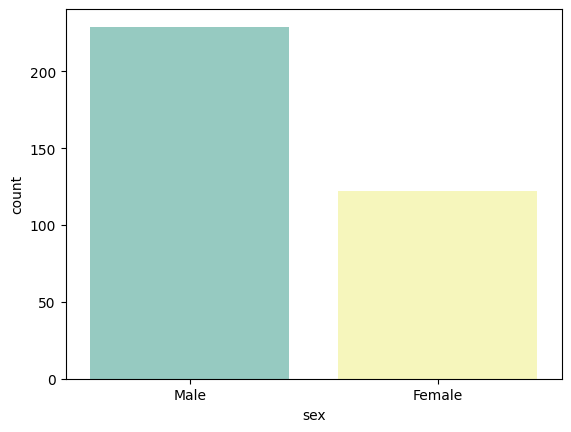

In [11]:
sns.countplot(x='sex', data=train_df, palette='Set3')
plt.show()

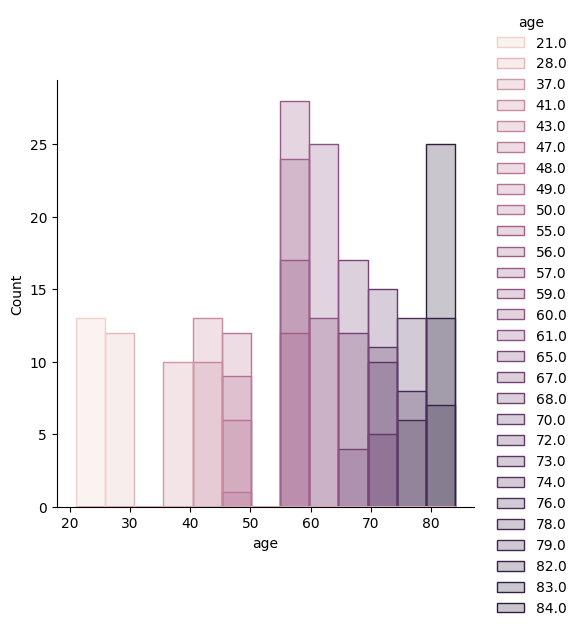

In [12]:
sns.displot(train_df, x="age", hue="age", element="step")

In [15]:
train_df['organ'].value_counts()

kidney            99
prostate          93
largeintestine    58
spleen            53
lung              48
Name: organ, dtype: int64

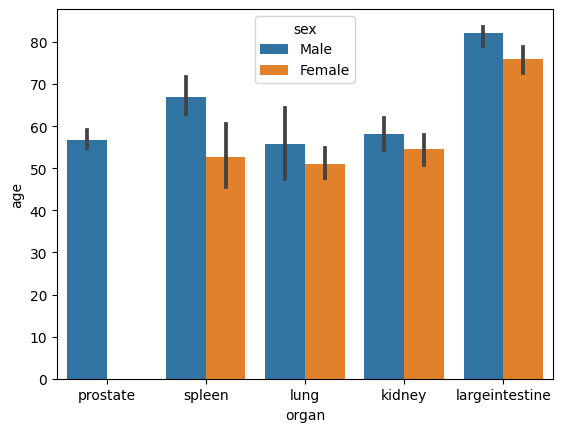

In [17]:
sns.barplot(x=train_df['organ'], y=train_df['age'],hue=train_df['sex']);